## ¿Qué es el K-means?


Es uno de los algoritmos de agrupamiento **(clustering)** más conocidos y utilizados en el campo del aprendizaje automático **no supervisado**. Su objetivo principal es organizar un conjunto de datos sin etiquetas en K grupos distintos. La idea central es que los puntos de datos dentro de un mismo grupo sean lo más similares posible entre sí, mientras que los puntos de diferentes grupos sean lo más disímiles posible.

## ¿Para qué se usa?

Se usa en una gran variedad de industrias para resolver porblemas que no tienen una respuesta **"Correcta"** predefinida. Algunas de las aplicaciones más comunes son:

**Segmentación de clientes:** Para dividir una base de clientes en grupos con comportamientos de compra o características demográficas similares.

**Análisis de imágenes:** En la compresión de imágenes, el K-means puede reducir la cantidad de colores en una imagen, agrupando colores similares.

**Análisis de datos geográficos:** Para identificar áreas con alta concentración de ciertos tipos de datos, como la densidad de tiendas o la propagación de enfermedades.

## **Cluster (Grupo):**
 Es el resultado final del algoritmo. Un cluster es un conjunto de puntos de datos que han sido agrupados por su similitud.


## **Centroide**
Es el "corazón" de un cluster. Es un punto imaginario que representa el centro geométrico o el promedio de todos los puntos de datos dentro de ese cluster. El algoritmo lo usa para determinar la pertenencia de los puntos a los grupos.

## **K**  
Es un valor que se le debe indicar al algoritmo. Representa el número de clusters que se desea crear. La selección de un valor adecuado para K es uno de los pasos más importantes para obtener un resultado significativo.


# Contexto del Problema: Conociendo los Datos 🐧

#### **Descripción del Dataset**

El conjunto de datos de pingüinos de Palmer Archipelago contiene información sobre tres especies de pingüinos: Adelia, Chinstrap y Gentoo. Incluye medidas corporales como la longitud del pico, la profundidad del pico, la longitud de las aletas y la masa corporal, así como el sexo y la isla de origen. Este dataset es perfecto para ver cómo un algoritmo de agrupamiento puede encontrar patrones y separar las diferentes especies sin haber sido "entrenado" con las etiquetas de especie.



### Variables del Dataset 📊

| Variable | Descripción |
|---|---|
| **species** | Especie del pingüino (Adelie, Chinstrap, Gentoo). |
| **island** | Isla del archipiélago Palmer donde se encontró el pingüino. |
| **bill_length_mm** | Longitud del pico (culmen) en milímetros. |
| **bill_depth_mm** | Profundidad del pico en milímetros. |
| **flipper_length_mm**| Longitud de la aleta en milímetros. |
| **body_mass_g** | Masa corporal del pingüino en gramos. |
| **sex** | Sexo del pingüino (Male, Female). |


In [2]:
import pandas as pd
import seaborn as sns

# Cargar el dataset de los pingüinos
penguins = sns.load_dataset("penguins")

# Mostrar una vista rápida de las primeras filas y los tipos de datos
display(penguins.head())
print("\nInformación del DataFrame:")
penguins.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB




###  Preparación de los Datos y Visualización Inicial 🧹

 El algoritmo solo funciona con **variables numéricas**, por lo que las columnas de texto (`species`, `island`, `sex`) no pueden ser usadas directamente. Además, como vimos, hay valores faltantes (`NaN`) que necesitan ser manejados para evitar errores en el cálculo de las distancias.

El método más simple y efectivo en este caso es eliminar las filas que contienen valores nulos, ya que el número de datos perdidos es muy pequeño (solo 2 de 344 registros). Después de eso, seleccionaremos las variables numéricas que usaremos para el agrupamiento. Una excelente opción es usar `bill_length_mm` (longitud del pico) y `flipper_length_mm` (longitud de la aleta), ya que estas dos características suelen mostrar una buena separación entre las especies de pingüinos.




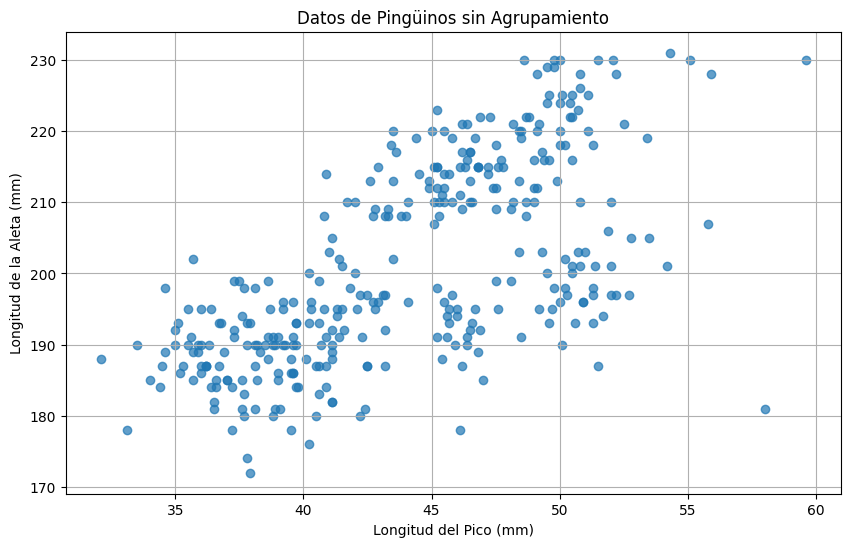

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Eliminar filas con valores nulos para garantizar que K-means funcione correctamente
penguins_clean = penguins.dropna()

# Seleccionar las variables numéricas que usaremos para el agrupamiento
X = penguins_clean[['bill_length_mm', 'flipper_length_mm']]

# Visualización de los datos crudos antes de aplicar el algoritmo
plt.figure(figsize=(10, 6))
plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], alpha=0.7)
plt.title('Datos de Pingüinos sin Agrupamiento')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Longitud de la Aleta (mm)')
plt.grid(True)
plt.show()




###  Aplicación de K-means: Paso a Paso 🤖

Ahora que tenemos nuestros datos limpios y visualizados, es el momento de aplicar el algoritmo K-means para agruparlos. El primer paso crucial es decidir el número de clusters, representado por la letra **K**.

En nuestro caso, sabemos que el dataset de pingüinos tiene tres especies. Por lo tanto, un valor de **K=3** es una elección lógica y nos permitirá ver si el algoritmo es capaz de agrupar los datos de una manera que coincida con las especies reales, incluso sin haberle dado esa información.

#### Inicialización: Elige a K Centroides

El algoritmo comienza seleccionando aleatoriamente **K puntos** en el espacio de los datos. Estos puntos iniciales se llaman **centroides**.

#### Asignación y Actualización de Clusters

A partir de ahí, el algoritmo realiza un proceso iterativo de dos pasos:

1.  **Asignación de clusters:** Cada punto de datos es asignado al centroide más cercano. La distancia más utilizada para esta asignación es la **distancia euclidiana**, que es la distancia en línea recta entre dos puntos.

2.  **Actualización de centroides:** Una vez que todos los puntos han sido asignados a un cluster, se recalcula la posición de cada centroide. El nuevo centroide se convierte en el **promedio** de todas las coordenadas de los puntos que le fueron asignados.

Este proceso de asignación y actualización se repite hasta que los centroides dejan de moverse significativamente. Esto indica que el algoritmo ha **convergido** y ha encontrado los clusters estables.




In [7]:
import numpy as np
from sklearn.cluster import KMeans

# Definimos el número de clusters (K). Elegimos 3 porque sabemos que hay 3 especies de pingüinos.
k = 3

# Inicializamos el modelo de K-means con 3 clusters.
# Usamos random_state para que los resultados sean reproducibles.
kmeans = KMeans(n_clusters=k, random_state=42)

# Aplicamos el algoritmo a nuestros datos (X)
# El método .fit_predict() entrena el modelo y asigna cada punto a un cluster
clusters = kmeans.fit_predict(X)

# Obtenemos las coordenadas de los centroides finales
centroides = kmeans.cluster_centers_

# Convertir las coordenadas de los centroides a un DataFrame de pandas para una mejor visualización
centroides_df = pd.DataFrame(centroides, columns=['Longitud del Pico (mm)', 'Longitud de la Aleta (mm)'])

# Asignar nombres a los clusters para mayor claridad
centroides_df.index = [f'Cluster {i}' for i in range(k)]

# Mostrar el DataFrame de los centroides
print("Coordenadas de los centroides finales:")
display(centroides_df)

Coordenadas de los centroides finales:


,Longitud del Pico (mm),Longitud de la Aleta (mm)
Cluster 0,45.954839,196.731183
Cluster 1,47.629600,216.920000
Cluster 2,38.453043,187.052174



###  Visualización de Resultados 🎨

 gráfico que muestre los puntos de datos coloreados según el cluster al que fueron asignados por el algoritmo y, además, marcaremos la posición de los centroides finales.


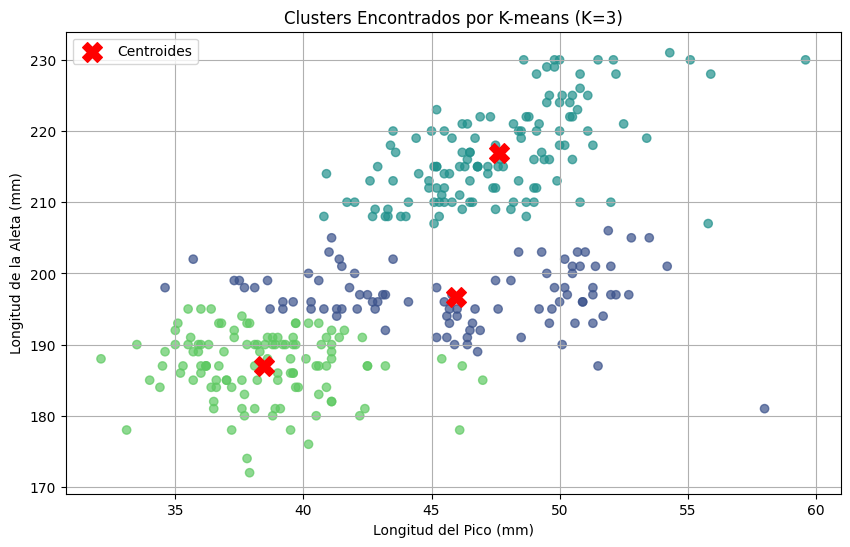

In [8]:

palette = sns.color_palette("viridis", k)

# Mapear los clusters a los colores de la paleta
colors = [palette[cluster_id] for cluster_id in clusters]

# Graficar los resultados
plt.figure(figsize=(10, 6))
# Gráfico de puntos, coloreados por el cluster asignado
plt.scatter(X['bill_length_mm'], X['flipper_length_mm'], c=colors, alpha=0.7)
# Marcar los centroides con un marcador especial (X)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=200, c='red', label='Centroides')

plt.title('Clusters Encontrados por K-means (K=3)')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Longitud de la Aleta (mm)')
plt.legend()
plt.grid(True)
plt.show()


#### 1. ¿Qué nos muestra el gráfico?
El gráfico nos revela la existencia de **tres grupos naturales** o "nubes" de datos. K-means, un algoritmo de **aprendizaje no supervisado**, logró identificar estos patrones sin saber de antemano a qué especie correspondía cada pingüino.

* El **cluster superior izquierdo** está compuesto por pingüinos con picos y aletas relativamente pequeñas.
* El **cluster inferior derecho** incluye a los pingüinos con las aletas y picos más grandes.
* El **cluster intermedio** contiene pingüinos con picos largos, pero aletas de tamaño intermedio.

#### 2. La función de los centroides
Los puntos marcados con una 'X' roja son los **centroides finales**. Cada uno representa el "centro de masa" de su respectivo cluster. Su posición es el resultado de la convergencia del algoritmo, demostrando que K-means ha encontrado los puntos óptimos que minimizan la distancia de cada pingüino a su centroide.

#### 3. El poder del algoritmo
En esencia, este gráfico es la prueba visual de que el algoritmo funcionó como se esperaba. Nos muestra cómo la **distancia euclidiana** y la **actualización iterativa de los centroides** logran segmentar un conjunto de datos en grupos coherentes. El resultado es una agrupación que, en este caso, se alinea perfectamente con la realidad biológica de las tres especies de pingüinos, demostrando el valor de K-means para la segmentación y el descubrimiento de patrones.
